In [2]:
import csv
import math
import numpy as np
import pandas as pd
import time
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import KFold

In [3]:
#data_path ='data_banknote_authentication.csv'
#with open(data_path, 'r') as f:
 #   reader = csv.reader(f, delimiter=',')
    
    # get header from first row
    #next(reader)
    # headers = next(reader)
    # get all the rows as a list
    #for row in reader:
     #   data = list(reader)
        # transform data into numpy array
      #  data = np.array(data).astype(float)
data0 = pd.read_csv("Train.csv")

In [4]:
data=np.copy(data0.values)
#labels=np.copy(data[:,data.shape[1]-1])
#data = np.delete(data, data.shape[1]-1, 1)
print('*FEATURES DATA*')
print(data.shape)
print(type(data[0,2]))
#print('*LABELS*')
#print(labels.shape)
#print(labels)

*FEATURES DATA*
(48500, 1393)
<class 'numpy.float64'>


In [5]:
# 368 where image pixels start
print(data[0,368])
images=np.copy(data[...,368:])
print(images.shape)
print(images)

nan
(48500, 1025)
[[ nan  nan 211. ...  nan 158.   7.]
 [ nan  nan 161. ... 160.  nan   2.]
 [ nan  nan  nan ...  nan 130.   9.]
 ...
 [247. 244. 246. ...  nan 145.   7.]
 [ nan 255. 255. ...  nan 209.   3.]
 [116. 117.  nan ...  nan 170.   7.]]


(32, 32)
[[ nan  nan  59. ...  nan  nan  nan]
 [ 76.  nan  nan ...  nan  nan  75.]
 [ 88. 102.  nan ...  92.  91.  nan]
 ...
 [ nan  nan  71. ... 161. 189. 135.]
 [115.  nan  nan ... 168. 176. 121.]
 [ 94.  nan  34. ...  nan  nan  nan]]


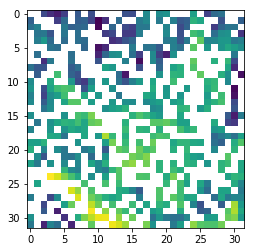

In [5]:
#conversion of 1024 to 32*32 with NaN=0
getimg=np.copy(np.resize(images[0,:], 1024).reshape(32,32))
print(getimg.shape)
print(getimg)
imgplot = plt.imshow(getimg)
plt.show()

In [7]:
#def FillAndReplaceImages(d1Images):
 #   print(d1Images.shape[0])
  #  for i in range(d1Images.shape[0]):
        getimg=np.copy(np.resize(d1Images[0,:], 1024).reshape(32,32))

        row = np.arange(0, getimg.shape[1])
        col = np.arange(0, getimg.shape[0])
        #mask invalid values
        getimg = np.ma.masked_invalid(getimg)
        xx, yy = np.meshgrid(row, col)
        x1 = xx[~getimg.mask]
        y1 = yy[~getimg.mask]
        newarr = getimg[~getimg.mask]

        GD1 = interpolate.griddata((x1, y1), newarr.ravel(),(xx, yy),method='cubic')
        #GD2 = interpolate.griddata((x1, y1), newarr.ravel(),(xx, yy),method='nearest')

        #Filling remaining values
        col_mean = np.nanmean(GD1, axis=0)
        #Find indicies that you need to replace
        inds = np.where(np.isnan(GD1))
        #Place column means in the indices. Align the arrays using take
        GD1[inds] = np.take(col_mean, inds[1])

        d1Images[0,:]=GD1.reshape(-1)
    return d1Images

    plt.figure(figsize=(18,18))

    plt.subplot(1,3,1);
    plt.title('Real Image')
    plt.imshow(getimg)

    plt.subplot(1,3,2);
    plt.title('Cubic')
    plt.imshow(GD1)

    plt.subplot(1,3,3);
    plt.title('Bilinear')
    plt.imshow(GD2)

IndentationError: unexpected indent (<ipython-input-7-2adcb9480329>, line 4)

In [7]:
#print(GD1.shape)
#print(type(GD1))
#print(GD1)
#print('-------------')

#print(GD1.reshape(-1).shape)
#print(GD1.reshape(-1))
print(images[8496,:])
start=time.time()
images=FillAndReplaceImages(images)
end=time.time()
print(end-start)
print(images[8496,:])

[ nan 196. 197. ...  nan 208.  nan]
9700
150.61567163467407
[116.10611279 196.         197.         ... 211.39784923 208.
  89.16700204]


In [9]:
#copying images data to original dataset
start=time.time()
data[:,368:data.shape[1]]=np.copy(images[:,:])
end=time.time()
print(end-start)
images=images.round()
#labels=labels.round()

0.08408951759338379


In [10]:
pd.DataFrame(images).to_csv("test_images.csv")

In [24]:
#pd.DataFrame(labels).to_csv("labels.csv")